In [56]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import pandas as pd
import cmath as cm

In [304]:
#Parameters
fr=4e9;
bw=10e6;
fs=60e9;
des=0.001;
Amp=1;
noise_power=1e-14*fs/2

In [305]:
#Tones Generation
N=10000;
t=np.arange(0,N/fr,1/fs)
M=400
st=np.zeros(len(t))

for i in range(0,M-1):
    st+=Amp*np.sin(2*np.pi*t*(fr+i*bw*(1+des*np.random.normal(1))))
st+=np.random.normal(scale=np.sqrt(noise_power), size=st.shape)

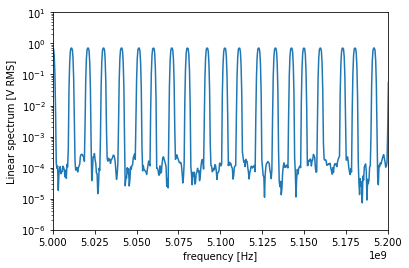

In [314]:
f, Pxx_spec = signal.periodogram(st, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlim([0.5e10, 0.52e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
smax=max(Pxx_spec);

In [322]:
a=[0 ,1 ,1e-12 ,-1e-6]

def nonlinamp(s,c):
    sn=c[0]+c[1]*s+c[2]*(s)**2+c[3]*(s)**3
    return sn

stnl=nonlinamp(st,a);

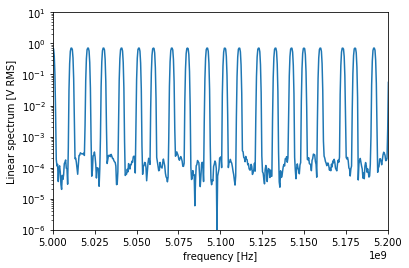

In [323]:
f, Pxx_specnl = signal.periodogram(stnl, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_specnl))
plt.xlim([0.5e10, 0.52e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

In [324]:
d=stnl-st

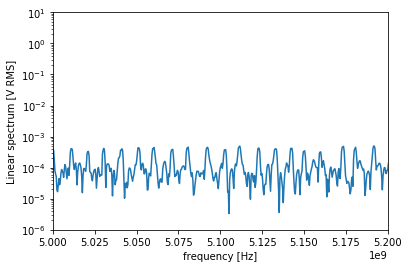

In [325]:
f, Pxx_specd = signal.periodogram(d, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_specd))
plt.ylim([1e-6, 1e1])
plt.xlim([0.5e10, 0.52e10])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()
dmax=max(Pxx_specd);

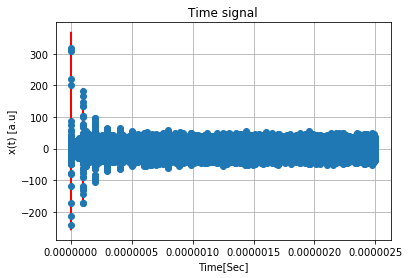

In [326]:
#Ploting s21

fig, ax = plt.subplots()
ax.plot(t,st,'r',t,stnl,'o')

ax.set(xlabel='Time[Sec]', ylabel='x(t) [a.u]',
       title='Time signal')
ax.grid()

fig.savefig("Time_domanin_Signal.pdf")
plt.show()

In [327]:
SNRdist=10*np.log10(smax/dmax)
print(SNRdist)

64.06583958925808


In [ ]:
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec),f, np.sqrt(Pxx_specnl))
plt.xlim([0.5e10, 0.52e10])
plt.ylim([1e-6, 1e1])
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()